In [4]:
# June 6th attempting model testing

import numpy as np
import pandas as pd
import os
import sys 
print(sys.executable)
from tabulate import tabulate
import numpy as np #need to double check numpy installation
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


/Users/schoudhry/anaconda3/bin/python


In [5]:
# Load the CSV files into DataFrames
csv_file_path5 = '/Users/schoudhry/Desktop/Supplementary Tables S5.csv'
csv_file_path6 = '/Users/schoudhry/Desktop/Supplementary Tables S6 S6.csv'
csv_file_path8 = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'

df5 = pd.read_csv(csv_file_path5)
df6 = pd.read_csv(csv_file_path6)
df8 = pd.read_csv(csv_file_path8)

df5.head(), df6.head(), df8.head()


(        Unnamed: 0                      Unnamed: 1  \
 0              NaN                             NaN   
 1      Overlap set                         Pathway   
 2  CRC & IBD & IBS  KEGG_OXIDATIVE_PHOSPHORYLATION   
 3              NaN                PID_RAC1_PATHWAY   
 4              NaN    PID_ERBB1_DOWNSTREAM_PATHWAY   
 
                                           Unnamed: 2  Unnamed: 3  Unnamed: 4  \
 0                                                NaN         NaN         NaN   
 1                          gene_names_in_pathway_CRC   p_val_CRC   p_adj_CRC   
 2  ATP6V1B2,ATP6V1C1,ATP6V1F,ATP6V1H,COX6C,COX7A2...    3.84E-13    8.90E-11   
 3  ACTR3,CYBB,CYFIP2,IQGAP3,MAP3K1,NCF1,NCKAP1,PLCB2  0.00386986   0.0112226   
 4  ARPC1B,ELK1,PPP2R2A,RAC1,RALA,RALGDS,RPS6,YWHA...  0.01941693  0.03128283   
 
                                           Unnamed: 5  Unnamed: 6  Unnamed: 7  \
 0                                                NaN         NaN         NaN   
 1                

Matching values in S5 (excluding zero): []


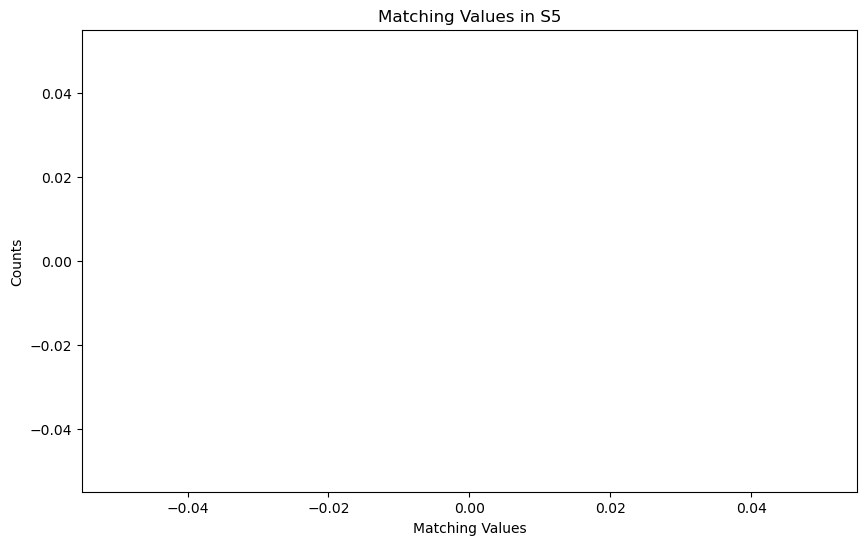

No matching rows found for Unnamed: 2. Skipping linear regression.
Matching values in S6 (excluding zero): []


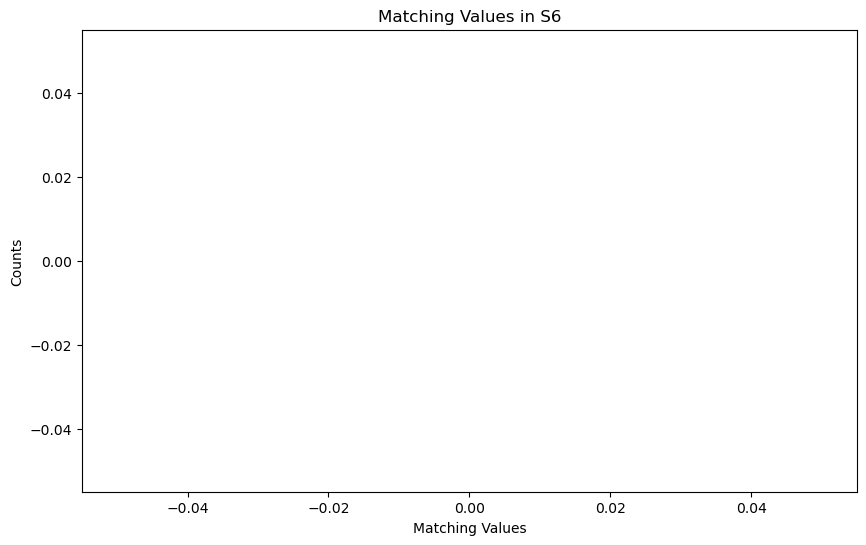

No matching rows found for Unnamed: 1. Skipping linear regression.
Matching values in S8 (excluding zero): []


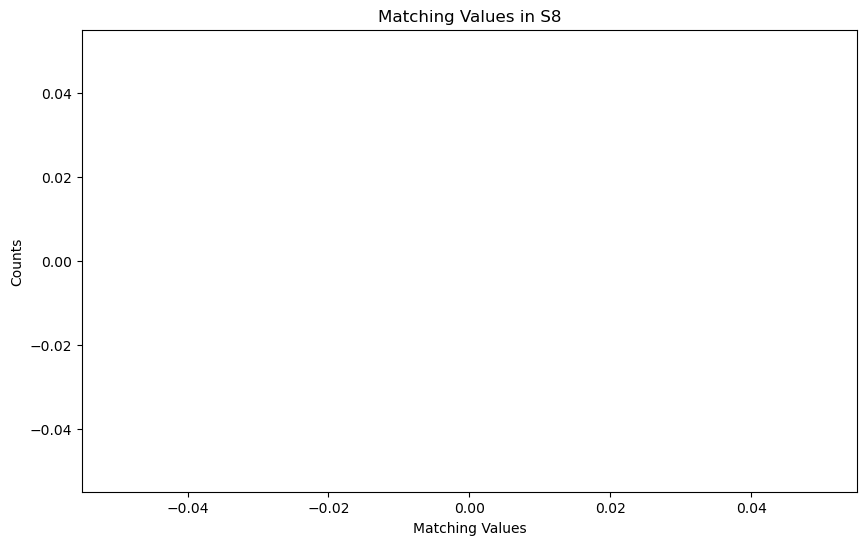

No matching rows found for Unnamed: 2. Skipping linear regression.


In [6]:


# Function to clean column data and find matching non-zero values
def find_matching_values(df, column_name):
    column_data = pd.to_numeric(df[column_name], errors='coerce')
    non_zero_values = column_data[column_data != 0].dropna()
    unique_values, counts = np.unique(non_zero_values, return_counts=True)
    matching_values = unique_values[counts > 1]
    return matching_values, df[column_data.isin(matching_values)]

# Function to perform linear regression and plot
def linear_regression_analysis(df, matching_rows, target_column_name):
    if matching_rows.empty:
        print(f"No matching rows found for {target_column_name}. Skipping linear regression.")
        return
    
    for column in df.columns[1:]:
        if column == target_column_name:
            continue

        X = pd.to_numeric(matching_rows[column], errors='coerce').dropna().values.reshape(-1, 1)
        y = pd.to_numeric(matching_rows[target_column_name], errors='coerce').dropna().values

        # Ensure that X and y have valid data
        if X.size == 0 or y.size == 0:
            print(f"No valid data for column {column} vs {target_column_name}. Skipping.")
            continue

        # Fit linear regression model
        regressor = LinearRegression()
        regressor.fit(X, y)
        
        # Predict values
        y_pred = regressor.predict(X)
        
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue')
        plt.plot(X, y_pred, color='red')
        plt.xlabel(column)
        plt.ylabel(target_column_name)
        plt.title(f'Linear Regression - {column} vs {target_column_name}')
        plt.show()

# Table S5 analysis
matching_values5, matching_rows5 = find_matching_values(df5, df5.columns[2])
print("Matching values in S5 (excluding zero):", matching_values5)

# Bar chart for matching values in S5
plt.figure(figsize=(10, 6))
plt.bar(matching_values5, np.unique(matching_rows5[df5.columns[2]], return_counts=True)[1])
plt.xlabel('Matching Values')
plt.ylabel('Counts')
plt.title('Matching Values in S5')
plt.show()

linear_regression_analysis(df5, matching_rows5, df5.columns[2])

# Table S6 analysis
matching_values6, matching_rows6 = find_matching_values(df6, df6.columns[1])
print("Matching values in S6 (excluding zero):", matching_values6)

# Bar chart for matching values in S6
plt.figure(figsize=(10, 6))
plt.bar(matching_values6, np.unique(matching_rows6[df6.columns[1]], return_counts=True)[1])
plt.xlabel('Matching Values')
plt.ylabel('Counts')
plt.title('Matching Values in S6')
plt.show()

linear_regression_analysis(df6, matching_rows6, df6.columns[1])

# Table S8 analysis
matching_values8, matching_rows8 = find_matching_values(df8, df8.columns[1])
print("Matching values in S8 (excluding zero):", matching_values8)

# Bar chart for matching values in S8
plt.figure(figsize=(10, 6))
plt.bar(matching_values8, np.unique(matching_rows8[df8.columns[1]], return_counts=True)[1])
plt.xlabel('Matching Values')
plt.ylabel('Counts')
plt.title('Matching Values in S8')
plt.show()

linear_regression_analysis(df8, matching_rows8, df8.columns[2])
#linear_regression_analysis("")
